# Test Dendrogram

This notebook is test to show how a dendrogram would be constructed using three novels.

## Add Lexos to the Jupyter `sys.path`

We run a small script to do this in the same folder as the notebook.

In [ ]:
%run jupyter_local_setup.py ../../../lexos

## Import Lexos Modules

In [1]:
from lexos.io.smart import Loader
from lexos import tokenizer
from lexos.dtm import DTM

## Load Data

We are taking _Pride and Prejudice_ and _Sense and Sensibility_ from the repository's test data, but we'll also download _Frankenstein_ from Project Gutenberg.

For quick run times, we'll take only the first 10000 characters from each novel.

In [2]:
data = ["../test_data/txt/Austen_Pride.txt", "../test_data/txt/Austen_Sense.txt", "https://www.gutenberg.org/files/84/84-0.txt"]

# Create the loader and load the data
loader = Loader()
loader.load(data)

# Shorten the texts
texts = [doc[0:10000] for doc in loader.texts]

## Make spaCy Docs

In [3]:
# Make the docs
docs = tokenizer.make_docs(texts)

## Make the Document-Term Matrix

**Important:** Because of a bug, we cannot currently submit spaCy docs to the `DTM` class. As a result, we will convert them to a list of token lists.

In [4]:
labels = ["Pride_and_Prejudice", "Sense_and_Sensibility", "Frankenstein"]
dtm = DTM(docs, labels)

## Show the DTM Table

In [5]:
df = dtm.get_table()
df.head()

,terms,Pride_and_Prejudice,Sense_and_Sensibility,Frankenstein
0,\r\n,66,153,118
1,\r\n\r\n,0,0,24
2,\r\n\r\n\r\n,0,0,3
3,\r\n\r\n\r\n\r\n\r\n,0,0,3
4,\r\n\r\n\r\n,0,0,1


## Make a Dendrogram

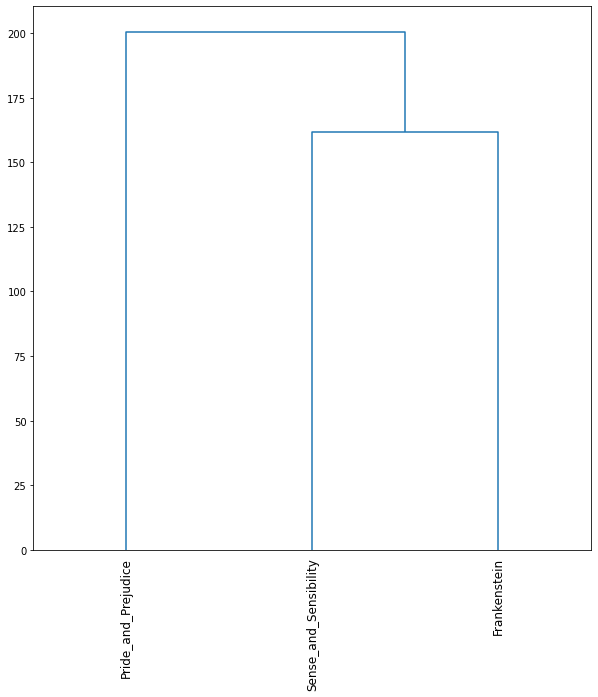

In [6]:
from lexos.cluster.dendrogram import Dendrogram
dendrogram = Dendrogram(dtm, show=True)